In [22]:
import ast

import pandas as pd
import os
import subprocess
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
os.chdir('/Users/kate_fieseler/PycharmProjects/retrievesynthesizable/A71EV2A')

In [12]:
df = pd.read_csv('base_compounds/csvs/master_base_compounds.csv')
df

,smiles,submitter_name,ref_pdb,hit_names,ID,ROMol,name
0,CC(=O)Nc1ccc(F)c2ccccc12,Matteo Ferla,x0554_0A,x0554_0A x0451_0A,Z57189107,<rdkit.Chem.rdchem.Mol object at 0x1754425f0>,matteo_ferla_fragmen_clust_Z57189107
1,CC(=O)Nc1cc(C)c2ccccc2n1,Matteo Ferla,x0554_0A,x0451_0A x0554_0A,Z1509204059,<rdkit.Chem.rdchem.Mol object at 0x175442cf0>,matteo_ferla_fragmen_clust_Z1509204059
2,N=C(N)NC(=O)[C@@H](N)c1ccccc1,Matteo Ferla,x0554_0A,x0566_0A,PV_006093142965,<rdkit.Chem.rdchem.Mol object at 0x175442d60>,matteo_ferla_fragmen_clust_PV_006093142965
3,Cc1ccc2ccccc2c1NC(N)=O,Matteo Ferla,x0554_0A,x0554_0A x0451_0A,Z1426819182,<rdkit.Chem.rdchem.Mol object at 0x175442740>,matteo_ferla_fragmen_clust_Z1426819182
4,Cc1nc(-c2cn(C)c3ccccc23)nn1C,Matteo Ferla,x0554_0A,x0451_0A,PV_002910358312,<rdkit.Chem.rdchem.Mol object at 0x175442ba0>,matteo_ferla_fragmen_clust_PV_002910358312
...,...,...,...,...,...,...,...
1344,CC(C#N)C(=O)NC1(CN(C)C(=O)CC2CCCO2)CC1,Steph Wills,x0310_0A,x0416_0A x0310_0A,PV-003517486233,<rdkit.Chem.rdchem.Mol object at 0x175b38ba0>,steph_fragnetv2_PV-003517486233
1345,Cc1ncc(-c2ccccc2)cc1NC(=O)C(C)C#N,Steph Wills,x0310_0A,x0416_0A x0310_0A,Z1539846561,<rdkit.Chem.rdchem.Mol object at 0x175b38c80>,steph_fragnetv2_Z1539846561
1346,Cc1ncc(-c2ccccc2)cc1NC(=O)C(F)(F)F,Steph Wills,x0310_0A,x0416_0A x0310_0A,Z1539842980,<rdkit.Chem.rdchem.Mol object at 0x175b38cf0>,steph_fragnetv2_Z1539842980
1347,CC(C#N)C(=O)NC1(CCNC(=O)C2CCCO2)CC1,Steph Wills,x0310_0A,x0416_0A x0310_0A,PV-003328854133,<rdkit.Chem.rdchem.Mol object at 0x175b38d60>,steph_fragnetv2_PV-003328854133


In [ ]:
# Run through retrosynthesis Manifold on terminal
# python /Users/kate_fieseler/PycharmProjects/postera/postera_retrosynthesis.py /Users/kate_fieseler/PycharmProjects/retrievesynthesizable/A71EV2A/base_compounds/csvs/master_base_compounds.csv 0

# I USED MAX_NUM_ROUTES_TO_RETURN = 10 (so there are 10 routes per compound)

In [14]:
# Organize routes into 1, 2, and 3 step elaborations.
# input: cache_path, csv of smiles path
# output: csv of specified compound, with single step reactions and reactants
# sqlite_path = "/Users/kate_fieseler/PycharmProjects/postera/cache/A71EV2A_NOV30_all_rxns.sqlite"
# results_dir = "/Users/kate_fieseler/PycharmProjects/retrievesynthesizable/A71EV2A/routes_data"
# csv_smiles = "/Users/kate_fieseler/PycharmProjects/retrievesynthesizable/A71EV2A/base_compounds/csvs/master_base_compounds.csv" # must contain header with 'smiles'
# command = [
#     "python",
#     "/Users/kate_fieseler/PycharmProjects/postera/process_cache_outputv2.py",
#     "-t",
#     sqlite_path,
#     "-r",
#     results_dir,
#     "-s",
#     csv_smiles,
#     "-n",
#     "2",
#     "-x"
# ]
# subprocess.run(command)

# I RAN THIS
# python /Users/kate_fieseler/PycharmProjects/postera/process_cache_outputv2.py -t /Users/kate_fieseler/PycharmProjects/postera/cache/A71EV2A_NOV30_all_rxns_max_num_10.sqlite -r /Users/kate_fieseler/PycharmProjects/retrievesynthesizable/A71EV2A/routes_data -x

SMILES to search: ['CC(=O)Nc1ccc(F)c2ccccc12', 'CC(=O)Nc1cc(C)c2ccccc2n1', 'N=C(N)NC(=O)[C@@H](N)c1ccccc1', 'Cc1ccc2ccccc2c1NC(N)=O', 'Cc1nc(-c2cn(C)c3ccccc23)nn1C', 'Cc1cnc(Cl)c(OCC(=O)C(C)(C)C)c1', 'Cc1cc(CNC(=O)[C@H](C)N)cnc1Cl', 'CCn1cc(C(=O)OC)c2ccccc21', 'CNC(=O)c1cccc2c(Cl)c(Cl)sc12', 'COc1ccccc1C1(NC(=O)C(C)N)CCOCC1', 'CCC(=O)Nc1cccc2ccccc12', 'CN(C(=O)c1cn(C)c2ccccc12)C(C)(C)C', 'Cc1ccc(C)c(NC(N)=O)c1', 'CC(C)NC(=O)c1c(N)cnn1C', 'CC(=O)NNC(=O)C1CCCN1c1ccccc1', 'Cc1cc(CN=C2NCC(C)N2)n(C)n1', 'CN(NC(=O)c1cn(C)c2ccccc12)C(N)=O', 'NNC(=O)[C@@H](N)c1ccccc1', 'COC(=O)c1c(C)n(C)c2ccccc12', 'CC(=O)NS(=O)(=O)c1cn(C)c2ccccc12', 'Cc1cc(COC(=O)C=CC(C)C)n(C)n1', 'CC(=O)Nc1cccc2ccc(O)cc12', 'NC(=O)Nc1cccc2cc(F)ccc12', 'CC(=O)Nc1c(C)ccc2cnccc12', 'Cc1cc(-c2nccc3cc[nH]c23)c(C)s1', 'CNC(=O)c1cc(C)ccc1NC(=O)[C@@H]1CC[C@H](C)O1', 'CC(N)C(=O)NC(C)c1cccc2cc[nH]c12', 'CCC(C)NC(=O)c1cn(C)c2ccccc12', 'C=Cc1sc(C(=O)OC)cc1C', 'C[C@H](NC(=O)[C@@H](C)N)c1ccccc1', 'CC(=O)Nc1cccc2nc(Cl)ccc12', 'CC(=O)Nc1ccc

CompletedProcess(args=['python', '/Users/kate_fieseler/PycharmProjects/postera/process_cache_outputv2.py', '-t', '/Users/kate_fieseler/PycharmProjects/postera/cache/A71EV2A_NOV30_all_rxns.sqlite', '-r', '/Users/kate_fieseler/PycharmProjects/retrievesynthesizable/A71EV2A/routes_data', '-s', '/Users/kate_fieseler/PycharmProjects/retrievesynthesizable/A71EV2A/base_compounds/csvs/master_base_compounds.csv', '-n', '2', '-x'], returncode=0)

In [15]:
df = pd.read_csv('/Users/kate_fieseler/PycharmProjects/retrievesynthesizable/A71EV2A/routes_data/all_smiles_routes_max_num_return_10.csv')
df

,smiles,num_steps,rxn_order_first_to_last,reactants,BuildingBlocks,catalogName_for_BuildingBlock
0,CC(=O)Nc1ccc(F)c2ccccc12,0,[],[],['CC(=O)Nc1ccc(F)c2ccccc12'],"['enamine_made', 'enamine_real']"
1,CC(=O)Nc1ccc(F)c2ccccc12,1,['Amide Schotten-Baumann with amine'],"[('Nc1ccc(F)c2ccccc12', 'CC(=O)Cl')]","['CC(=O)Nc1ccc(F)c2ccccc12', 'Nc1ccc(F)c2ccccc...","['enamine_made', 'enamine_real', 'generic', 'e..."
2,CC(=O)Nc1ccc(F)c2ccccc12,1,['Buchwald-Hartwig amidation with amide-like n...,"[('Fc1ccc(I)c2ccccc12', 'CC(N)=O')]","['CC(=O)Nc1ccc(F)c2ccccc12', 'CC(N)=O', 'Fc1cc...","['enamine_made', 'enamine_real', 'generic', 'm..."
3,CC(=O)Nc1ccc(F)c2ccccc12,1,['Ester amidation'],"[('Nc1ccc(F)c2ccccc12', 'CC(=O)OC(C)(C)C')]","['CC(=O)Nc1ccc(F)c2ccccc12', 'Nc1ccc(F)c2ccccc...","['enamine_made', 'enamine_real', 'generic', 'e..."
4,CC(=O)Nc1ccc(F)c2ccccc12,1,['Amidation'],"[('Nc1ccc(F)c2ccccc12', 'CC(=O)O')]","['Nc1ccc(F)c2ccccc12', 'CC(=O)Nc1ccc(F)c2ccccc...","['generic', 'enamine_made', 'mcule', 'molport'..."
...,...,...,...,...,...,...
13337,CC(=O)Nc1nc(C(=O)N(C)CC2CCCO2)cs1,1,['Amidation'],"[('CN(CC1CCCO1)C(=O)c1csc(N)n1', 'CC(=O)O')]","['CN(CC1CCCO1)C(=O)c1csc(N)n1', 'CC(=O)O', 'CC...","['enamine_made', 'enamine_real', 'mcule', 'gen..."
13338,CC(=O)Nc1nc(C(=O)N(C)CC2CCCO2)cs1,1,['N-Ac protection'],"[('CN(CC1CCCO1)C(=O)c1csc(N)n1',)]","['CN(CC1CCCO1)C(=O)c1csc(N)n1', 'CC(=O)Nc1nc(C...","['enamine_made', 'enamine_real', 'enamine_made']"
13339,CC(=O)Nc1nc(C(=O)N(C)CC2CCCO2)cs1,1,['Buchwald-Hartwig amidation with amide-like n...,"[('CN(CC1CCCO1)C(=O)c1csc(I)n1', 'CC(N)=O')]","['CC(=O)Nc1nc(C(=O)N(C)CC2CCCO2)cs1', 'CN(CC1C...","['enamine_made', 'enamine_real', 'generic', 'e..."
13340,CC(=O)Nc1nc(C(=O)N(C)CC2CCCO2)cs1,1,['Buchwald-Hartwig amidation with amide-like n...,"[('CN(CC1CCCO1)C(=O)c1csc(Br)n1', 'CC(N)=O')]","['CC(N)=O', 'CC(=O)Nc1nc(C(=O)N(C)CC2CCCO2)cs1...","['generic', 'enamine_made', 'molport', 'enamin..."


In [19]:
# Get first route for each compound with num_steps = 1 or 2 but more than 0
df_1_2 = df[(df['num_steps'] <= 2) & (df['num_steps'] > 0)]
df_1_2 = df_1_2.drop_duplicates(subset=['smiles'], keep='first')
df_1_2

,smiles,num_steps,rxn_order_first_to_last,reactants,BuildingBlocks,catalogName_for_BuildingBlock
1,CC(=O)Nc1ccc(F)c2ccccc12,1,['Amide Schotten-Baumann with amine'],"[('Nc1ccc(F)c2ccccc12', 'CC(=O)Cl')]","['CC(=O)Nc1ccc(F)c2ccccc12', 'Nc1ccc(F)c2ccccc...","['enamine_made', 'enamine_real', 'generic', 'e..."
11,CC(=O)Nc1cc(C)c2ccccc2n1,1,['Amidation'],"[('Cc1cc(N)nc2ccccc12', 'CC(=O)O')]","['Cc1cc(N)nc2ccccc12', 'CC(=O)Nc1cc(C)c2ccccc2...","['mcule', 'molport', 'enamine_bb', 'enamine_ma..."
21,N=C(N)NC(=O)[C@@H](N)c1ccccc1,1,['N-Cbz deprotection'],"[('N=C(N)NC(=O)C(NC(=O)OCc1ccccc1)c1ccccc1',)]","['N=C(N)NC(=O)C(NC(=O)OCc1ccccc1)c1ccccc1', 'N...","['enamine_real', 'enamine_real', 'enamine_made']"
31,Cc1ccc2ccccc2c1NC(N)=O,1,['Formation of urea from two amines'],"[('N', 'Cc1ccc2ccccc2c1N')]","['Cc1ccc2ccccc2c1N', 'N', 'Cc1ccc2ccccc2c1NC(N...","['enamine_made', 'enamine_bb', 'molport', 'mcu..."
41,Cc1nc(-c2cn(C)c3ccccc23)nn1C,1,['Sp2-sp2 Suzuki coupling'],"[('Cn1cc(B2OC(C)(C)C(C)(C)O2)c2ccccc21', 'Cc1n...","['Cn1cc(B2OC(C)(C)C(C)(C)O2)c2ccccc21', 'Cc1nc...","['molport', 'enamine_bb', 'mcule', 'enamine_ma..."
...,...,...,...,...,...,...
13293,CC(C#N)C(=O)NC1(CN(C)C(=O)CC2CCCO2)CC1,1,['Amidation'],"[('CN(CC1(N)CC1)C(=O)CC1CCCO1', 'CC(C#N)C(=O)O')]","['CN(CC1(N)CC1)C(=O)CC1CCCO1', 'CC(C#N)C(=O)O'...","['enamine_made', 'enamine_real', 'enamine_bb',..."
13303,Cc1ncc(-c2ccccc2)cc1NC(=O)C(C)C#N,1,['Amidation'],"[('Cc1ncc(-c2ccccc2)cc1N', 'CC(C#N)C(=O)O')]","['Cc1ncc(-c2ccccc2)cc1N', 'CC(C#N)C(=O)O', 'Cc...","['enamine_bb', 'mcule', 'enamine_made', 'enami..."
13313,Cc1ncc(-c2ccccc2)cc1NC(=O)C(F)(F)F,1,['Amidation'],"[('O=C(O)C(F)(F)F', 'Cc1ncc(-c2ccccc2)cc1N')]","['O=C(O)C(F)(F)F', 'Cc1ncc(-c2ccccc2)cc1NC(=O)...","['generic', 'enamine_made', 'molport', 'mcule'..."
13323,CC(C#N)C(=O)NC1(CCNC(=O)C2CCCO2)CC1,1,['Ester amidation'],"[('NC1(CCNC(=O)C2CCCO2)CC1', 'CCOC(=O)C(C)C#N')]","['NC1(CCNC(=O)C2CCCO2)CC1', 'CC(C#N)C(=O)NC1(C...","['enamine_real', 'enamine_made', 'enamine_real..."


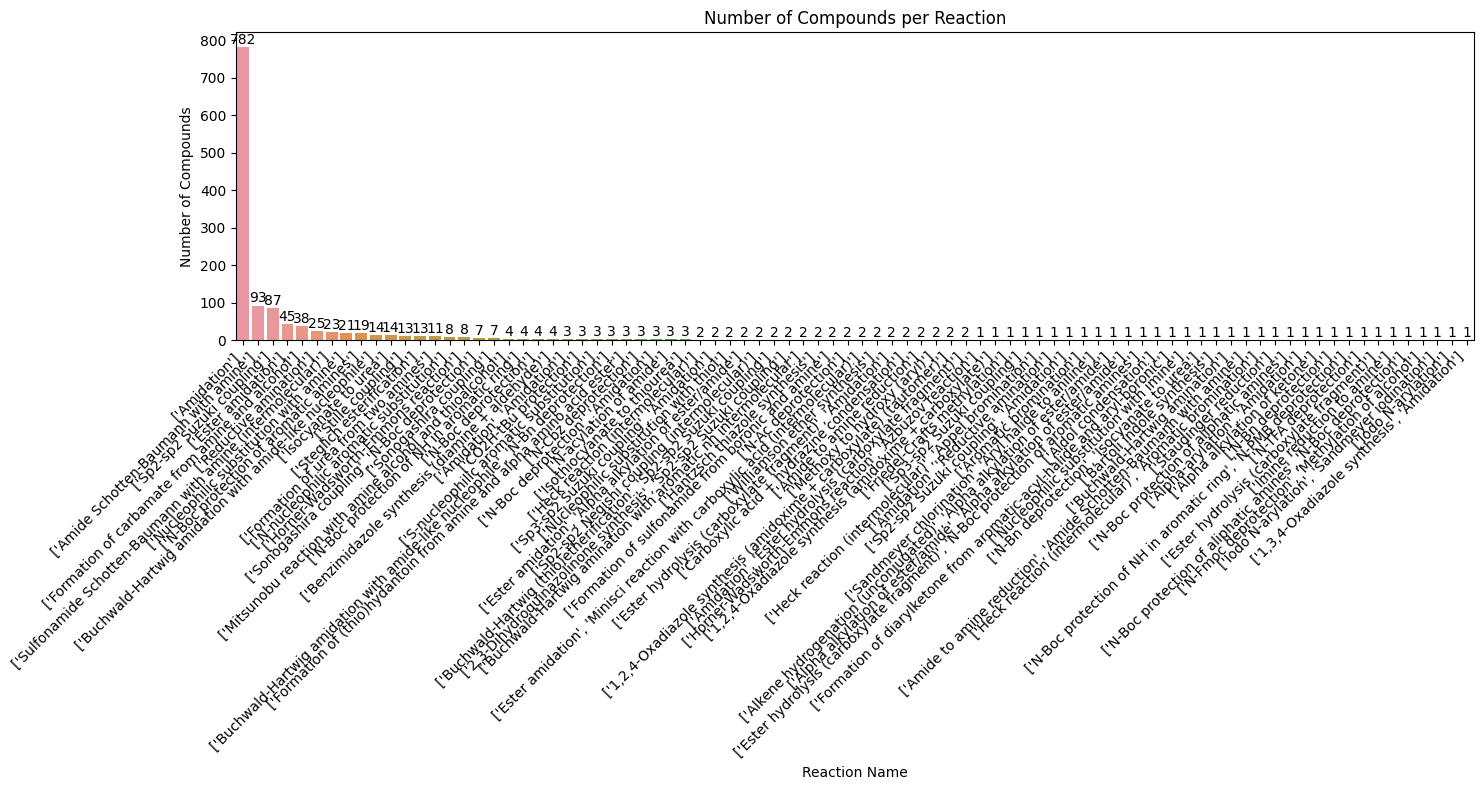

In [28]:
# Show histogram of number of rxn_order_first_to_last
# Make histogram of number of analogs per reaction for 2nd step of 2 step
rxn_order_counts_df2 = df_1_2.rxn_order_first_to_last.value_counts()
# Plotting
plt.figure(figsize=(15, 8))  # Increased figure size
barplot = sns.barplot(x=rxn_order_counts_df2.index, y=rxn_order_counts_df2.values)
plt.xticks(rotation=45, ha='right')
plt.xlabel("Reaction Name")
plt.ylabel("Number of Compounds")
plt.title("Number of Compounds per Reaction")

for p in barplot.patches:
    height = p.get_height()
    barplot.text(p.get_x() + p.get_width() / 2., 
                 height + 0.1,  # Slightly higher offset
                 f'{int(height)}',  # Converting to int for better readability
                 ha='center', 
                 va='bottom', 
                 fontsize=10)

plt.tight_layout()  # Adjust layout
plt.show()

In [29]:
len(df_1_2)

1343

In [30]:
# Show subset of top 10 most common reactions
top_10 = rxn_order_counts_df2[:10]
top_10

['Amidation']                                                   782
['Amide Schotten-Baumann with amine']                            93
['Sp2-sp2 Suzuki coupling']                                      87
['Ester amidation']                                              45
['Formation of carbamate from amine and alcohol']                38
['Reductive amination']                                          25
['Sulfonamide Schotten-Baumann with amine (intermolecular)']     23
['Nucleophilic substitution with amine']                         21
['N-Boc protection of aromatic amines']                          19
['Buchwald-Hartwig amidation with amide-like nucleophile']       14
Name: rxn_order_first_to_last, dtype: int64

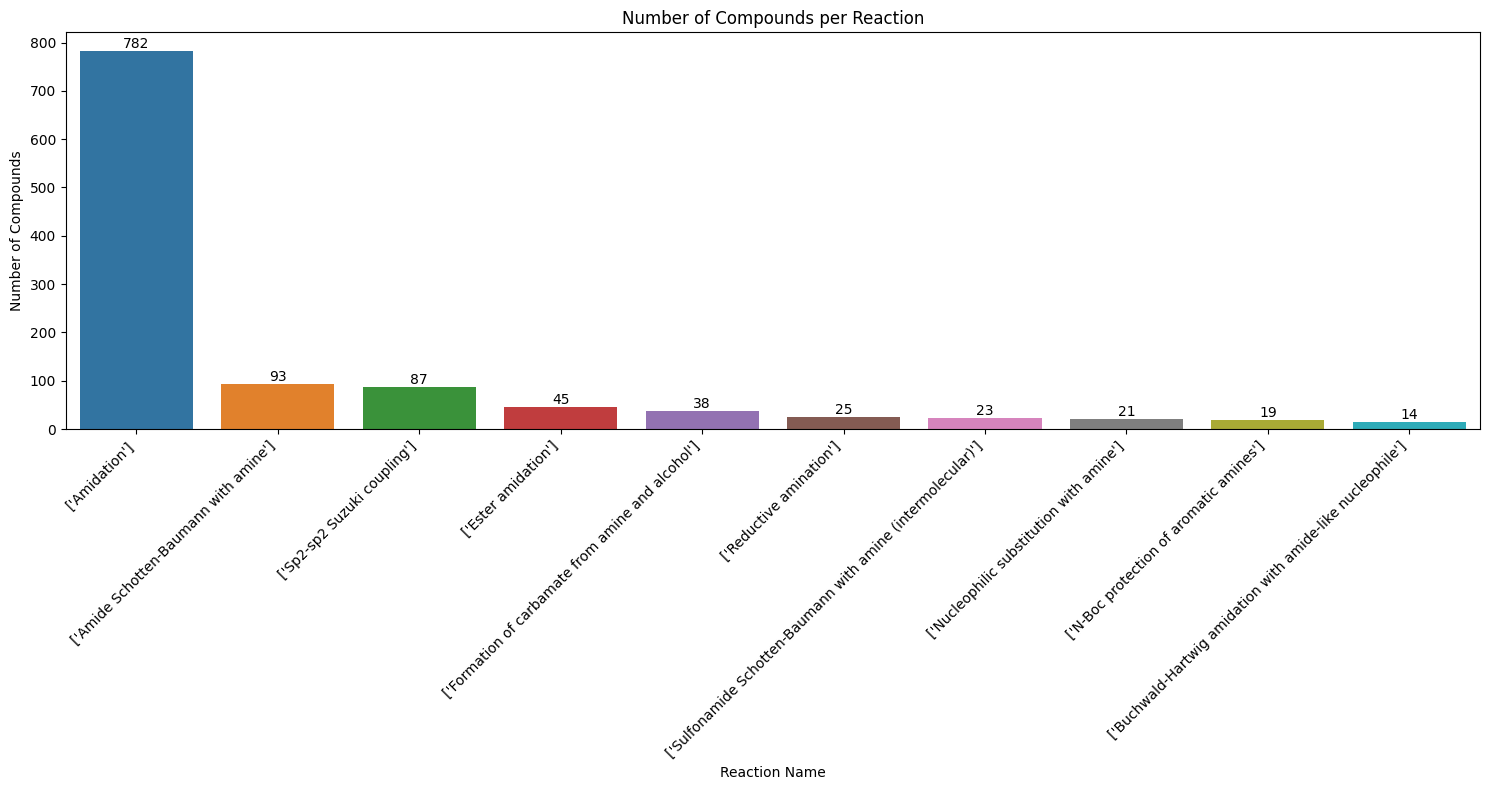

In [31]:
# Plotting
plt.figure(figsize=(15, 8))  # Increased figure size
barplot = sns.barplot(x=top_10.index, y=top_10.values)
plt.xticks(rotation=45, ha='right')
plt.xlabel("Reaction Name")
plt.ylabel("Number of Compounds")
plt.title("Number of Compounds per Reaction")

for p in barplot.patches:
    height = p.get_height()
    barplot.text(p.get_x() + p.get_width() / 2., 
                 height + 0.1,  # Slightly higher offset
                 f'{int(height)}',  # Converting to int for better readability
                 ha='center', 
                 va='bottom', 
                 fontsize=10)

plt.tight_layout()  # Adjust layout
plt.show()

In [36]:
# read in smarts json
import json
with open('/Users/kate_fieseler/PycharmProjects/retrievesynthesizable/D68EV3CPROA/RXN_SMARTS_CONSTANTS.json') as json_file:
    smarts = json.load(json_file)
smarts_names = list(smarts.keys())
smarts_names

['Amidation',
 'Amide_schotten-baumann',
 'Reductive_amination',
 'N-nucleophilic_aromatic_substitution',
 'Sp2-sp2_Suzuki_coupling',
 'Formation_of_urea_from_two_amines',
 'Sulfonamide_Schotten-Baumann_with_amine_(intermolecular)',
 'Buchwald-Hartwig_amination',
 'Nucleophilic_substitution_with_thiol',
 'Mitsunobu_reaction_with_amine_alcohol_and_thioalcohol',
 'Amide_Schotten-Baumann_with_amine',
 'Ester_amidation',
 'Nucleophilic_substitution_with_amine',
 'N-Boc_deprotection',
 'Sp3-sp2_Suzuki_coupling',
 'Buchwald-Hartwig_amidation_with_amide-like_nucleophile',
 'Steglich_esterification',
 'N-Bn_deprotection',
 'Williamson_ether_synthesis',
 'Epoxide_+_amine_coupling']

In [57]:
# Change rxn_order_first_to_last to string of first rxn name
df_1_2['reaction_name'] = df_1_2['rxn_order_first_to_last'].apply(lambda x: ast.literal_eval(x)[0].replace(' ', '_'))
df_1_2

,smiles,num_steps,rxn_order_first_to_last,reactants,BuildingBlocks,catalogName_for_BuildingBlock,reaction_name
1,CC(=O)Nc1ccc(F)c2ccccc12,1,['Amide Schotten-Baumann with amine'],"[('Nc1ccc(F)c2ccccc12', 'CC(=O)Cl')]","['CC(=O)Nc1ccc(F)c2ccccc12', 'Nc1ccc(F)c2ccccc...","['enamine_made', 'enamine_real', 'generic', 'e...",Amide_Schotten-Baumann_with_amine
11,CC(=O)Nc1cc(C)c2ccccc2n1,1,['Amidation'],"[('Cc1cc(N)nc2ccccc12', 'CC(=O)O')]","['Cc1cc(N)nc2ccccc12', 'CC(=O)Nc1cc(C)c2ccccc2...","['mcule', 'molport', 'enamine_bb', 'enamine_ma...",Amidation
21,N=C(N)NC(=O)[C@@H](N)c1ccccc1,1,['N-Cbz deprotection'],"[('N=C(N)NC(=O)C(NC(=O)OCc1ccccc1)c1ccccc1',)]","['N=C(N)NC(=O)C(NC(=O)OCc1ccccc1)c1ccccc1', 'N...","['enamine_real', 'enamine_real', 'enamine_made']",N-Cbz_deprotection
31,Cc1ccc2ccccc2c1NC(N)=O,1,['Formation of urea from two amines'],"[('N', 'Cc1ccc2ccccc2c1N')]","['Cc1ccc2ccccc2c1N', 'N', 'Cc1ccc2ccccc2c1NC(N...","['enamine_made', 'enamine_bb', 'molport', 'mcu...",Formation_of_urea_from_two_amines
41,Cc1nc(-c2cn(C)c3ccccc23)nn1C,1,['Sp2-sp2 Suzuki coupling'],"[('Cn1cc(B2OC(C)(C)C(C)(C)O2)c2ccccc21', 'Cc1n...","['Cn1cc(B2OC(C)(C)C(C)(C)O2)c2ccccc21', 'Cc1nc...","['molport', 'enamine_bb', 'mcule', 'enamine_ma...",Sp2-sp2_Suzuki_coupling
...,...,...,...,...,...,...,...
13293,CC(C#N)C(=O)NC1(CN(C)C(=O)CC2CCCO2)CC1,1,['Amidation'],"[('CN(CC1(N)CC1)C(=O)CC1CCCO1', 'CC(C#N)C(=O)O')]","['CN(CC1(N)CC1)C(=O)CC1CCCO1', 'CC(C#N)C(=O)O'...","['enamine_made', 'enamine_real', 'enamine_bb',...",Amidation
13303,Cc1ncc(-c2ccccc2)cc1NC(=O)C(C)C#N,1,['Amidation'],"[('Cc1ncc(-c2ccccc2)cc1N', 'CC(C#N)C(=O)O')]","['Cc1ncc(-c2ccccc2)cc1N', 'CC(C#N)C(=O)O', 'Cc...","['enamine_bb', 'mcule', 'enamine_made', 'enami...",Amidation
13313,Cc1ncc(-c2ccccc2)cc1NC(=O)C(F)(F)F,1,['Amidation'],"[('O=C(O)C(F)(F)F', 'Cc1ncc(-c2ccccc2)cc1N')]","['O=C(O)C(F)(F)F', 'Cc1ncc(-c2ccccc2)cc1NC(=O)...","['generic', 'enamine_made', 'molport', 'mcule'...",Amidation
13323,CC(C#N)C(=O)NC1(CCNC(=O)C2CCCO2)CC1,1,['Ester amidation'],"[('NC1(CCNC(=O)C2CCCO2)CC1', 'CCOC(=O)C(C)C#N')]","['NC1(CCNC(=O)C2CCCO2)CC1', 'CC(C#N)C(=O)NC1(C...","['enamine_real', 'enamine_made', 'enamine_real...",Ester_amidation


In [59]:
# Get compounds that have a reaction with reaction name in smarts_names
df_1_2_smarts = df_1_2[df_1_2['reaction_name'].isin(smarts_names)]
df_1_2_smarts

,smiles,num_steps,rxn_order_first_to_last,reactants,BuildingBlocks,catalogName_for_BuildingBlock,reaction_name
1,CC(=O)Nc1ccc(F)c2ccccc12,1,['Amide Schotten-Baumann with amine'],"[('Nc1ccc(F)c2ccccc12', 'CC(=O)Cl')]","['CC(=O)Nc1ccc(F)c2ccccc12', 'Nc1ccc(F)c2ccccc...","['enamine_made', 'enamine_real', 'generic', 'e...",Amide_Schotten-Baumann_with_amine
11,CC(=O)Nc1cc(C)c2ccccc2n1,1,['Amidation'],"[('Cc1cc(N)nc2ccccc12', 'CC(=O)O')]","['Cc1cc(N)nc2ccccc12', 'CC(=O)Nc1cc(C)c2ccccc2...","['mcule', 'molport', 'enamine_bb', 'enamine_ma...",Amidation
31,Cc1ccc2ccccc2c1NC(N)=O,1,['Formation of urea from two amines'],"[('N', 'Cc1ccc2ccccc2c1N')]","['Cc1ccc2ccccc2c1N', 'N', 'Cc1ccc2ccccc2c1NC(N...","['enamine_made', 'enamine_bb', 'molport', 'mcu...",Formation_of_urea_from_two_amines
41,Cc1nc(-c2cn(C)c3ccccc23)nn1C,1,['Sp2-sp2 Suzuki coupling'],"[('Cn1cc(B2OC(C)(C)C(C)(C)O2)c2ccccc21', 'Cc1n...","['Cn1cc(B2OC(C)(C)C(C)(C)O2)c2ccccc21', 'Cc1nc...","['molport', 'enamine_bb', 'mcule', 'enamine_ma...",Sp2-sp2_Suzuki_coupling
51,Cc1cnc(Cl)c(OCC(=O)C(C)(C)C)c1,1,['Williamson ether synthesis'],"[('Cc1cnc(Cl)c(O)c1', 'CC(C)(C)C(=O)CBr')]","['CC(C)(C)C(=O)CBr', 'Cc1cnc(Cl)c(OCC(=O)C(C)(...","['enamine_made', 'enamine_bb', 'molport', 'mcu...",Williamson_ether_synthesis
...,...,...,...,...,...,...,...
13293,CC(C#N)C(=O)NC1(CN(C)C(=O)CC2CCCO2)CC1,1,['Amidation'],"[('CN(CC1(N)CC1)C(=O)CC1CCCO1', 'CC(C#N)C(=O)O')]","['CN(CC1(N)CC1)C(=O)CC1CCCO1', 'CC(C#N)C(=O)O'...","['enamine_made', 'enamine_real', 'enamine_bb',...",Amidation
13303,Cc1ncc(-c2ccccc2)cc1NC(=O)C(C)C#N,1,['Amidation'],"[('Cc1ncc(-c2ccccc2)cc1N', 'CC(C#N)C(=O)O')]","['Cc1ncc(-c2ccccc2)cc1N', 'CC(C#N)C(=O)O', 'Cc...","['enamine_bb', 'mcule', 'enamine_made', 'enami...",Amidation
13313,Cc1ncc(-c2ccccc2)cc1NC(=O)C(F)(F)F,1,['Amidation'],"[('O=C(O)C(F)(F)F', 'Cc1ncc(-c2ccccc2)cc1N')]","['O=C(O)C(F)(F)F', 'Cc1ncc(-c2ccccc2)cc1NC(=O)...","['generic', 'enamine_made', 'molport', 'mcule'...",Amidation
13323,CC(C#N)C(=O)NC1(CCNC(=O)C2CCCO2)CC1,1,['Ester amidation'],"[('NC1(CCNC(=O)C2CCCO2)CC1', 'CCOC(=O)C(C)C#N')]","['NC1(CCNC(=O)C2CCCO2)CC1', 'CC(C#N)C(=O)NC1(C...","['enamine_real', 'enamine_made', 'enamine_real...",Ester_amidation


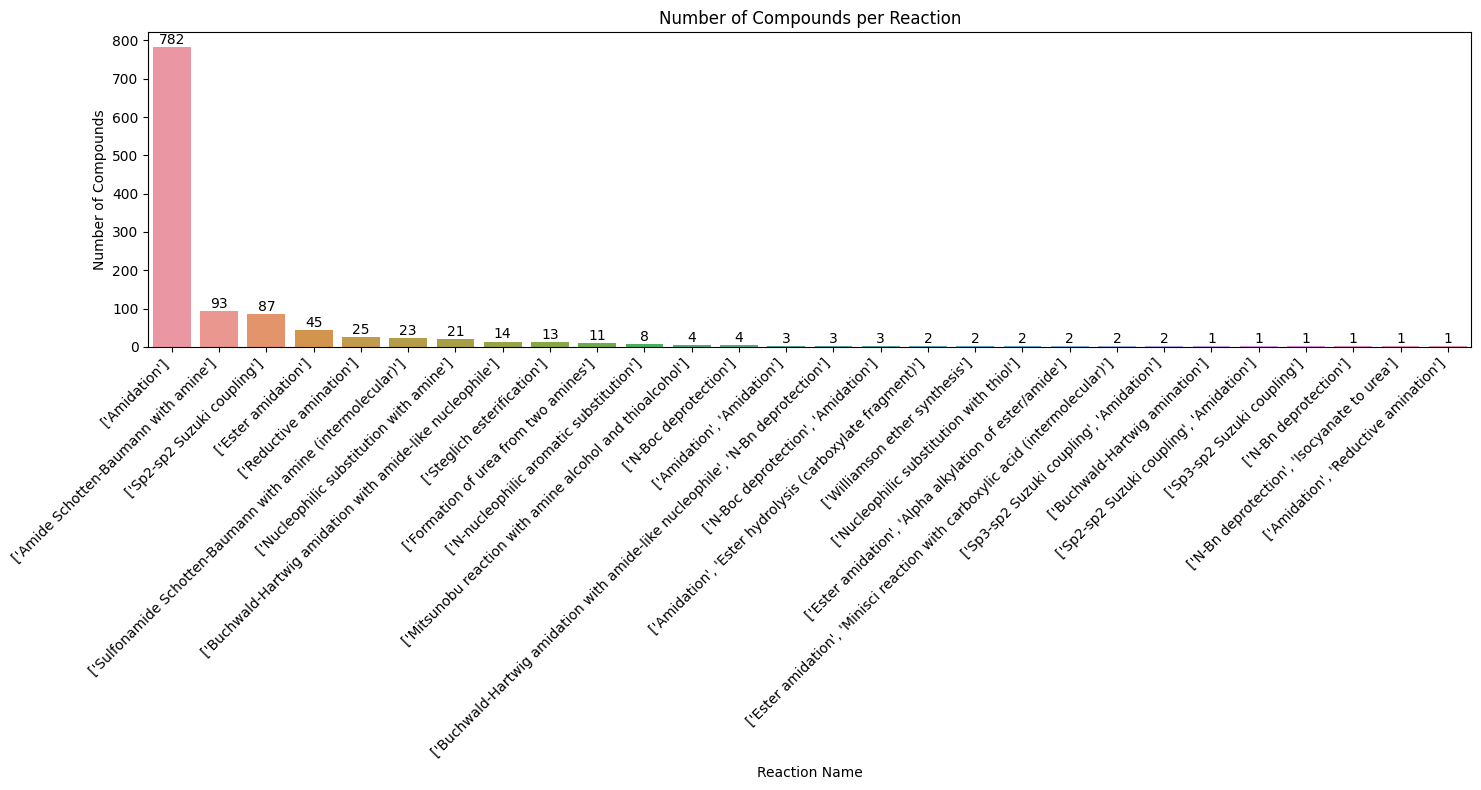

In [60]:
# show histogram
rxn_order_counts = df_1_2_smarts.rxn_order_first_to_last.value_counts()
# Plotting
plt.figure(figsize=(15, 8))  # Increased figure size
barplot = sns.barplot(x=rxn_order_counts.index, y=rxn_order_counts.values)
plt.xticks(rotation=45, ha='right')
plt.xlabel("Reaction Name")
plt.ylabel("Number of Compounds")
plt.title("Number of Compounds per Reaction")

for p in barplot.patches:
    height = p.get_height()
    barplot.text(p.get_x() + p.get_width() / 2., 
                 height + 0.1,  # Slightly higher offset
                 f'{int(height)}',  # Converting to int for better readability
                 ha='center', 
                 va='bottom', 
                 fontsize=10)

plt.tight_layout()  # Adjust layout
plt.show()

In [61]:
len(df_1_2_smarts)

1157

In [62]:
# percent diff to df_1_2
len(df_1_2_smarts)/len(df_1_2)

0.8615040953090097